# Toy example of different vectorizations

/var/folders/m7/07_d9tw159s6qj66krsxw7980000gn/T/ipykernel_22022/4222193963.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


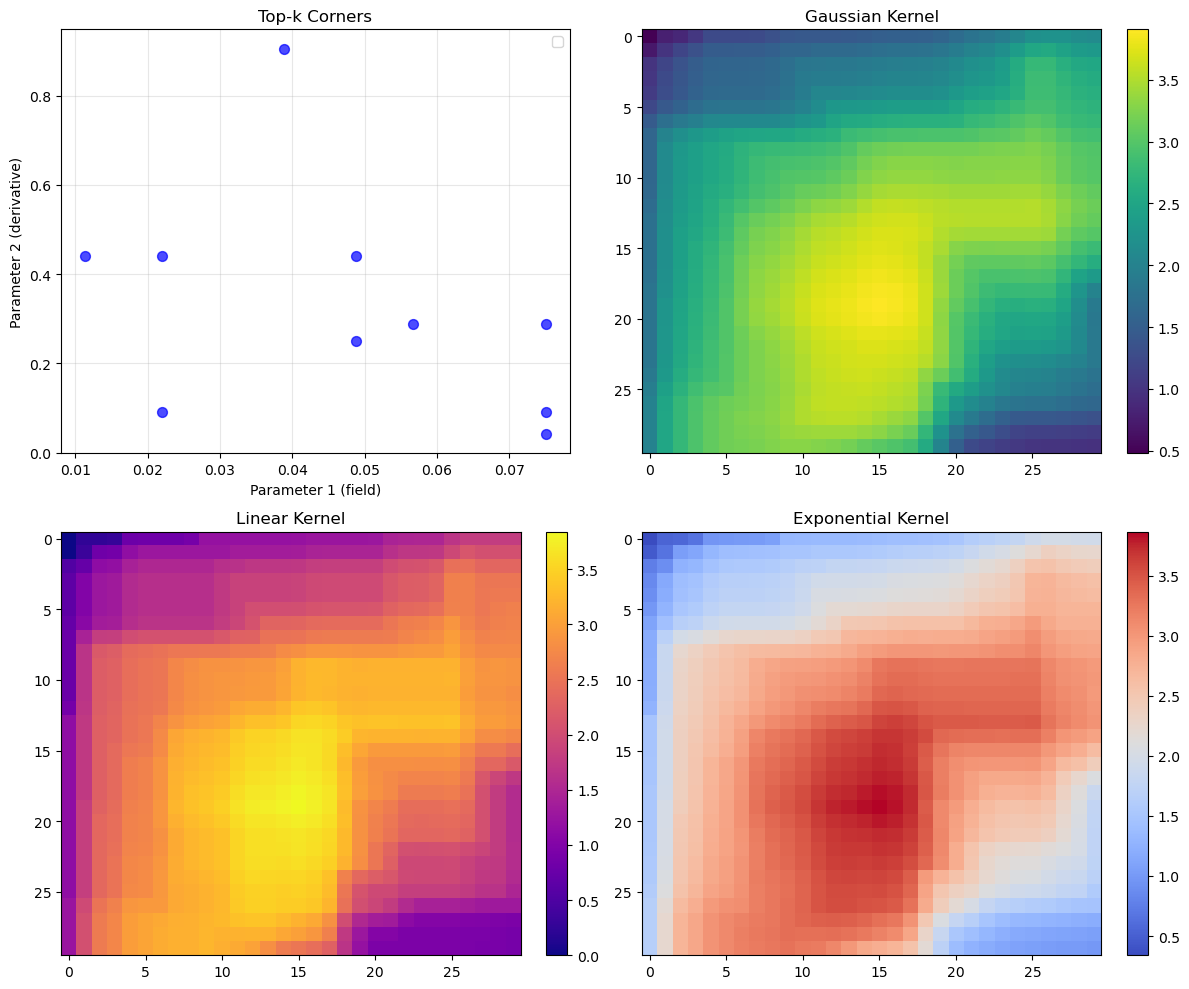

In [ ]:
from mma_vectorization import mma_vectorize
import torch
import matplotlib.pyplot as plt

field = torch.rand(10, 10, requires_grad=True)
derivative = torch.rand(10, 10, requires_grad=True)

# Different vectorizations:
vec_corners = mma_vectorize(field, derivative, method="corners", k=10)
vec_gaussian = mma_vectorize(field, derivative, method="gaussian")
vec_linear = mma_vectorize(field, derivative, method="linear")
vec_exponential = mma_vectorize(field, derivative, method="exponential")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Corners - scatter plot
ax = axes[0, 0]
ax.scatter(vec_corners.detach().numpy()[:, 0], vec_corners.detach().numpy()[:, 1], c='blue', s=50, alpha=0.7)
ax.set_title('Top-k Corners')
ax.set_xlabel('Parameter 1 (field)')
ax.set_ylabel('Parameter 2 (derivative)')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Gaussian kernel - viridis
ax = axes[0, 1]
im1 = ax.imshow(vec_gaussian.detach().numpy(), cmap='viridis', aspect='auto')
ax.set_title('Gaussian Kernel')
plt.colorbar(im1, ax=ax, fraction=0.046)

# 3. Linear kernel - plasma
ax = axes[1, 0]
im2 = ax.imshow(vec_linear.detach().numpy(), cmap='plasma', aspect='auto')
ax.set_title('Linear Kernel')
plt.colorbar(im2, ax=ax, fraction=0.046)

# 4. Exponential kernel - coolwarm
ax = axes[1, 1]
im3 = ax.imshow(vec_exponential.detach().numpy(), cmap='coolwarm', aspect='auto')
ax.set_title('Exponential Kernel')
plt.colorbar(im3, ax=ax, fraction=0.046)

plt.tight_layout()
plt.show()

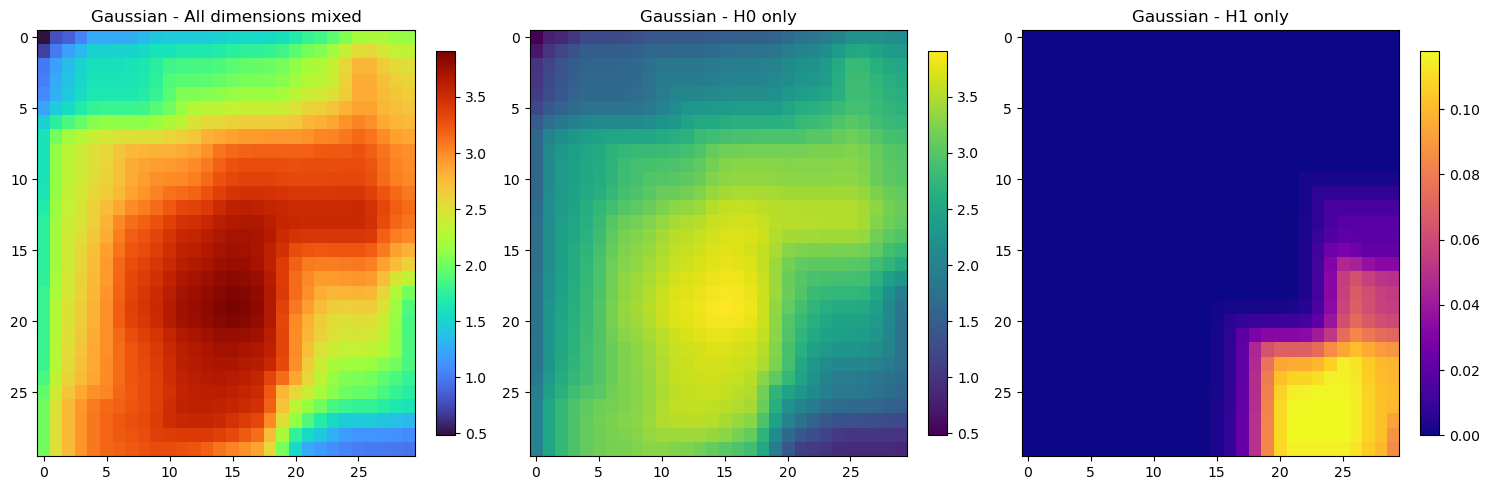

In [21]:
# Now different homological dimensions
vec_gaussian1 = mma_vectorize(field, derivative, method="gaussian")
vec_gaussian2 = mma_vectorize(field, derivative, method="gaussian", homology_degree=0)
vec_gaussian3 = mma_vectorize(field, derivative, method="gaussian", homology_degree=1)
vec_gaussian4 = mma_vectorize(field, derivative, method="gaussian", homology_degree='concat') #This is the concat version of the previous two

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Gaussian kernel default
ax = axes[0]
im0 = ax.imshow(vec_gaussian1.detach().numpy(), cmap='turbo', aspect='auto')
ax.set_title('Gaussian - All dimensions mixed')
plt.colorbar(im0, ax=ax, fraction=0.046)

# 2. Gaussian kernel H0 only
ax = axes[1]
im1 = ax.imshow(vec_gaussian2.detach().numpy(), cmap='viridis', aspect='auto')
ax.set_title('Gaussian - H0 only')
plt.colorbar(im1, ax=ax, fraction=0.046)

# 3. Gaussian kernel H1 only
ax = axes[2]
im2 = ax.imshow(vec_gaussian3.detach().numpy(), cmap='plasma', aspect='auto')
ax.set_title('Gaussian - H1 only')
plt.colorbar(im2, ax=ax, fraction=0.046)

plt.tight_layout()
plt.show()